## Concurrency using Asyncio in Python

### Concurrency

In computer science, concurrency is the ability of different parts or units of a program to be executed out-of-order or in partial order, without affecting the final outcome.

concurrency is a property of system which enables overlapping of process lifetimes (threading and AsyncIO)

Threading and asyncio both run on a single processor and therefore only run one at a time.

#### How to achive concurrency using Asyncio ?

before learning about Asyncio, lets understand about Synchronous and Asynchronous operation.


#### Synchronous

synchronous means that you can only execute one thing at a time. It blocks a process till the operation completes

In the below example, there are 5 tasks and each task starts executing only when its previous task completes its operation.

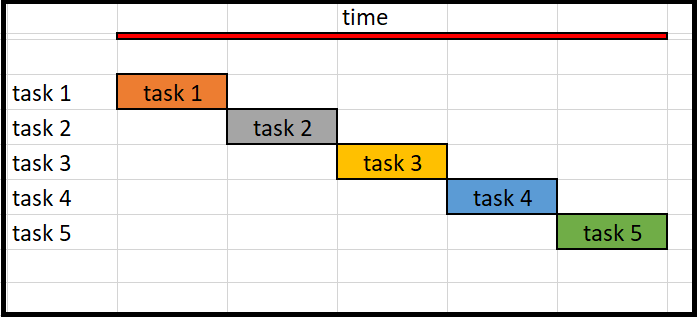




#### Asynchronous

A style of concurrent programming in which the tasks release the CPU during waiting periods, so that other tasks can use it.

Asyncio is a library to write concurrent code using the async/await syntax.


Asyncio uses cooperative multitasking. The tasks must cooperate by announcing when they are ready to be switched out. That means that the code in the task has to change slightly to make this happen.

### Coroutine

coroutines are the foundation for Asynchronous program in python.  
It is a function which can pause and resume its execution at any stage in its life cycle.
A variant of function that enables concurrency via cooperative multitasking

#### Cooperative multitasking (non-preemptive multtasking)

In this style of multitasking, operating system will not context switch from a running process to another process. Instead, processes voluntarily yield control periodically or when blocked in order to enable multiple applications to be run concurrently.



In the below example, 

there are 3 tasks, we start coroutine task-1 and at some stage we pause the execution of task-1 and start execution of task-2 and now after some time, we pause task-2 and start task-3, again at some stage we pause task-3 and resume task-1. Now at some stage we pause task-1 and start task-2 and continues.coroutine works in this way. 

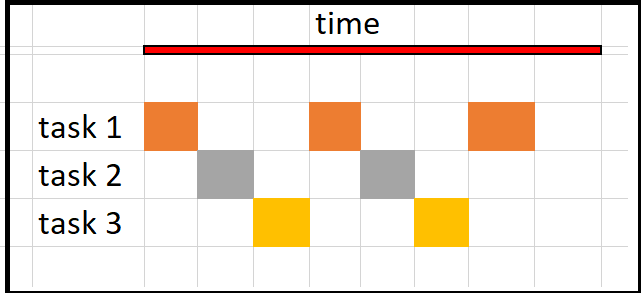


Lets write a function and convert it to coroutine.

In [3]:
def my_func():
    print("Hello World!")
my_func()   

Hello World!


prefered way to create coroutine for asyncio program is by declaring it with async/await syntax

In [4]:
# syntax : 
async def my_func():
    print("Hello World!")


<coroutine object my_func at 0x00000223C651D5C8>

Now, we have create a coroutine funciton, but calling my_func() will not execute the function. It returns coroutine object.

In [5]:
my_func()   

<coroutine object my_func at 0x00000223C651D548>

How to execute coroutine:
- use asyncio.run() function
- use await 
- use asyncio.create_task() function to run coroutines concurrently 

below syntax was used in older python versions (3.5):

The event loop is the core of every asyncio application. Event loops run asynchronous tasks and callbacks, perform network IO operations, and run subprocesses.

loop = asyncio.get_event_loop()

loop.run_until_complete(coroutine_method))

loop.close()

---------

In newer version (python 3.7 onwards)
asyncio.run(coroutine_method)

In [7]:
await my_func()

Hello World!


In [ ]:
# pause execution of coroutine:
async def coroutine_method():
    await wait_for_method()
    .
    .
    .

#### Example: Synchronous Python
when we call main() method, then my_func() is called.
- sleep for 1 sec
- prints reed
- again sleep for 1 sec
- prints blue
- again sleep for 1 sec
- print green

my_func() is called 3 times sequentially. So it took ~9 sec to complete its execution.

In [37]:
import time
def my_func():
    time.sleep(1)
    print('red')
    time.sleep(1)
    print('blue')
    time.sleep(1)
    print('green')

def main():
    my_func()
    my_func()
    my_func()

if __name__ == '__main__':
    t1 = time.perf_counter()
    main()
    t2 = time.perf_counter()
    print(f'{t2-t1} sec')

red
blue
green
red
blue
green
red
blue
green
9.078161400000681 sec


In [ ]:
# red
# blue
# green
# red
# blue
# green
# red
# blue
# green
# 9.078161400000681 sec

#### Example: ASynchronous Python

It took only 3 sec to run, the first my_func cycle started and as soon as it hits await asyncio.sleep(1), python was free to do other works, i.e, it started 2nd cycle and subsequenty 3rd my_func cycle. This is why we have all 1st, 2nd and 3rd cycle running concurrently.



In [40]:
import time
import asyncio

async def my_func():
    await asyncio.sleep(1)
    print('red')
    await asyncio.sleep(1)
    print('blue')
    await asyncio.sleep(1)
    print('green')

async def main():
#     task = [count() for _ in range(0,3)]
#     await asyncio.gather(*task)
    await asyncio.gather(my_func(),my_func(),my_func())

if __name__ == '__main__':
    t1 = time.perf_counter()
    await main()
#     asyncio.run(main())
    t2 = time.perf_counter()
    print(f'{t2-t1} sec')
   

red
red
red
blue
blue
blue
green
green
green
3.0178662999969674 sec


multi-processing and multi-threading has operating system (OS) role scheduling multitasking work, In threading python Global interpretor lock prevents multicore concurrency.

In Async, there is no operatng system (OS) intervention. There is 1 process and 1 thread so, task can release CPU and during waiting periods, other tasks can use it. 

Asynchronous framework needs a scheduler , usually called an event loop. This keeps track of all the running task, and wen function is suspended , it return control to the event loop, which then will find other function to start/resume. This is called as  cooperative multi tasking.

Asyncio provides a asynchronous framework efficiently handles i/o events. An applications interacts with event loop explicitly. It registers code to be run and let the scheduler make the necessary calls into applicaiton code when the resource is available.

This mechanism from yielding control back to the event loop depends on coroutine.



Another example compose of executing code using await keyword with another coroutine. while it pause, the coroutine state is maintained allowing it to resume where it left off.one coroutine (fruit()) can start another (wait_for_water()) and wait for result. this makes it easier to decompose task into reusuable parts.

In [36]:
# loop = asyncio.get_event_loop()
async def fruit():
    print('inside fruit shop')
    
    print('waiting for water')
    water = await wait_for_water()
    
    print('waiting for melon')
    water_melon = await wait_for_melon(water)
    
    return water_melon

async def wait_for_water():
    print('fetch water')
    return 'water'

async def wait_for_melon(a):
    print('fetch melon')
    return a + ' melon'


# if __name__ == '__main__':
print(f'fruit name : {await fruit()}')

inside fruit shop
waiting for water
fetch water
waiting for melon
fetch melon
fruit name : water melon


In [41]:
# inside fruit shop
# waiting for water
# fetch water
# waiting for melon
# fetch melon
# fruit name : water melon